In [1]:
import os
import random
#import cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

seed = 99
np.random.seed(seed)

2023-03-16 18:15:36.668858: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
input_path = 'chest_xray/'
order = ['train', 'val', 'test']

**Q1: Exploratory Data Analysis (4 Pts)**

Download and explore the data. Explore label distribution and qualitatively describe the data by plotting healthy and pneumonia samples. Do you see visual differences between healthy and disease samples? Do you find sources of bias that could influence model performance? How do you preprocess the data for your further analysis?

**Q1: Exploratory Data Analysis (4 Pts)**

Download and explore the data. Explore label distribution and qualitatively describe the data by plotting healthy and pneumonia samples. Do you see visual differences between healthy and disease samples? Do you find sources of bias that could influence model performance? How do you preprocess the data for your further analysis?

Set: train, normal images: 1341, pneumonia images: 3875
Set: val, normal images: 8, pneumonia images: 8
Set: test, normal images: 234, pneumonia images: 390


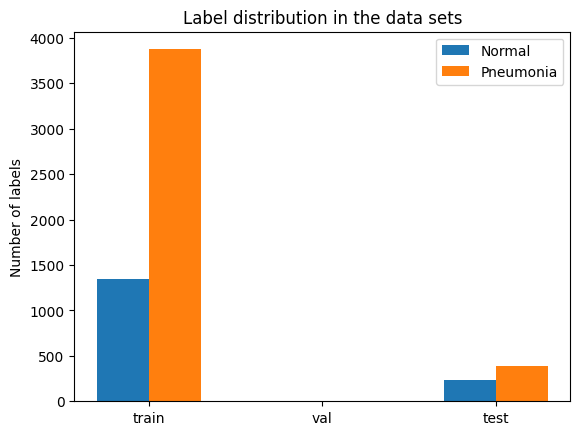

In [21]:
Normal = []
Pneumonia = []
for _set in order:
    li = os.listdir(input_path + _set + '/NORMAL')
    if ('.DS_Store' in li): li.remove('.DS_Store')
    n_normal = len(li)
    Normal.append(n_normal)
    
    la = os.listdir(input_path + _set + '/PNEUMONIA')
    if ('.DS_Store' in la): la.remove('.DS_Store')
    n_infect = len(la)
    Pneumonia.append(n_infect)
    print('Set: {}, normal images: {}, pneumonia images: {}'.format(_set, n_normal, n_infect))

x = np.arange(len(order))
width = 0.30  
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Normal, width, label='Normal')
rects2 = ax.bar(x + width/2, Pneumonia, width, label='Pneumonia')

ax.set_ylabel('Number of labels')
ax.set_xticks(x)
ax.set_xticklabels(order)
ax.legend()
plt.title("Label distribution in the data sets")
plt.show()

**Healthy vs. pneumonia samples**

Label 0: Pneumonia

Label 1: Normal

In [37]:
# https://www.kaggle.com/code/sainiamit/chest-xray-pneumonia-image-classification
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_training_data('chest_xray/chest_xray/train')
test = get_training_data('chest_xray/chest_xray/test')
val = get_training_data('chest_xray/chest_xray/val')

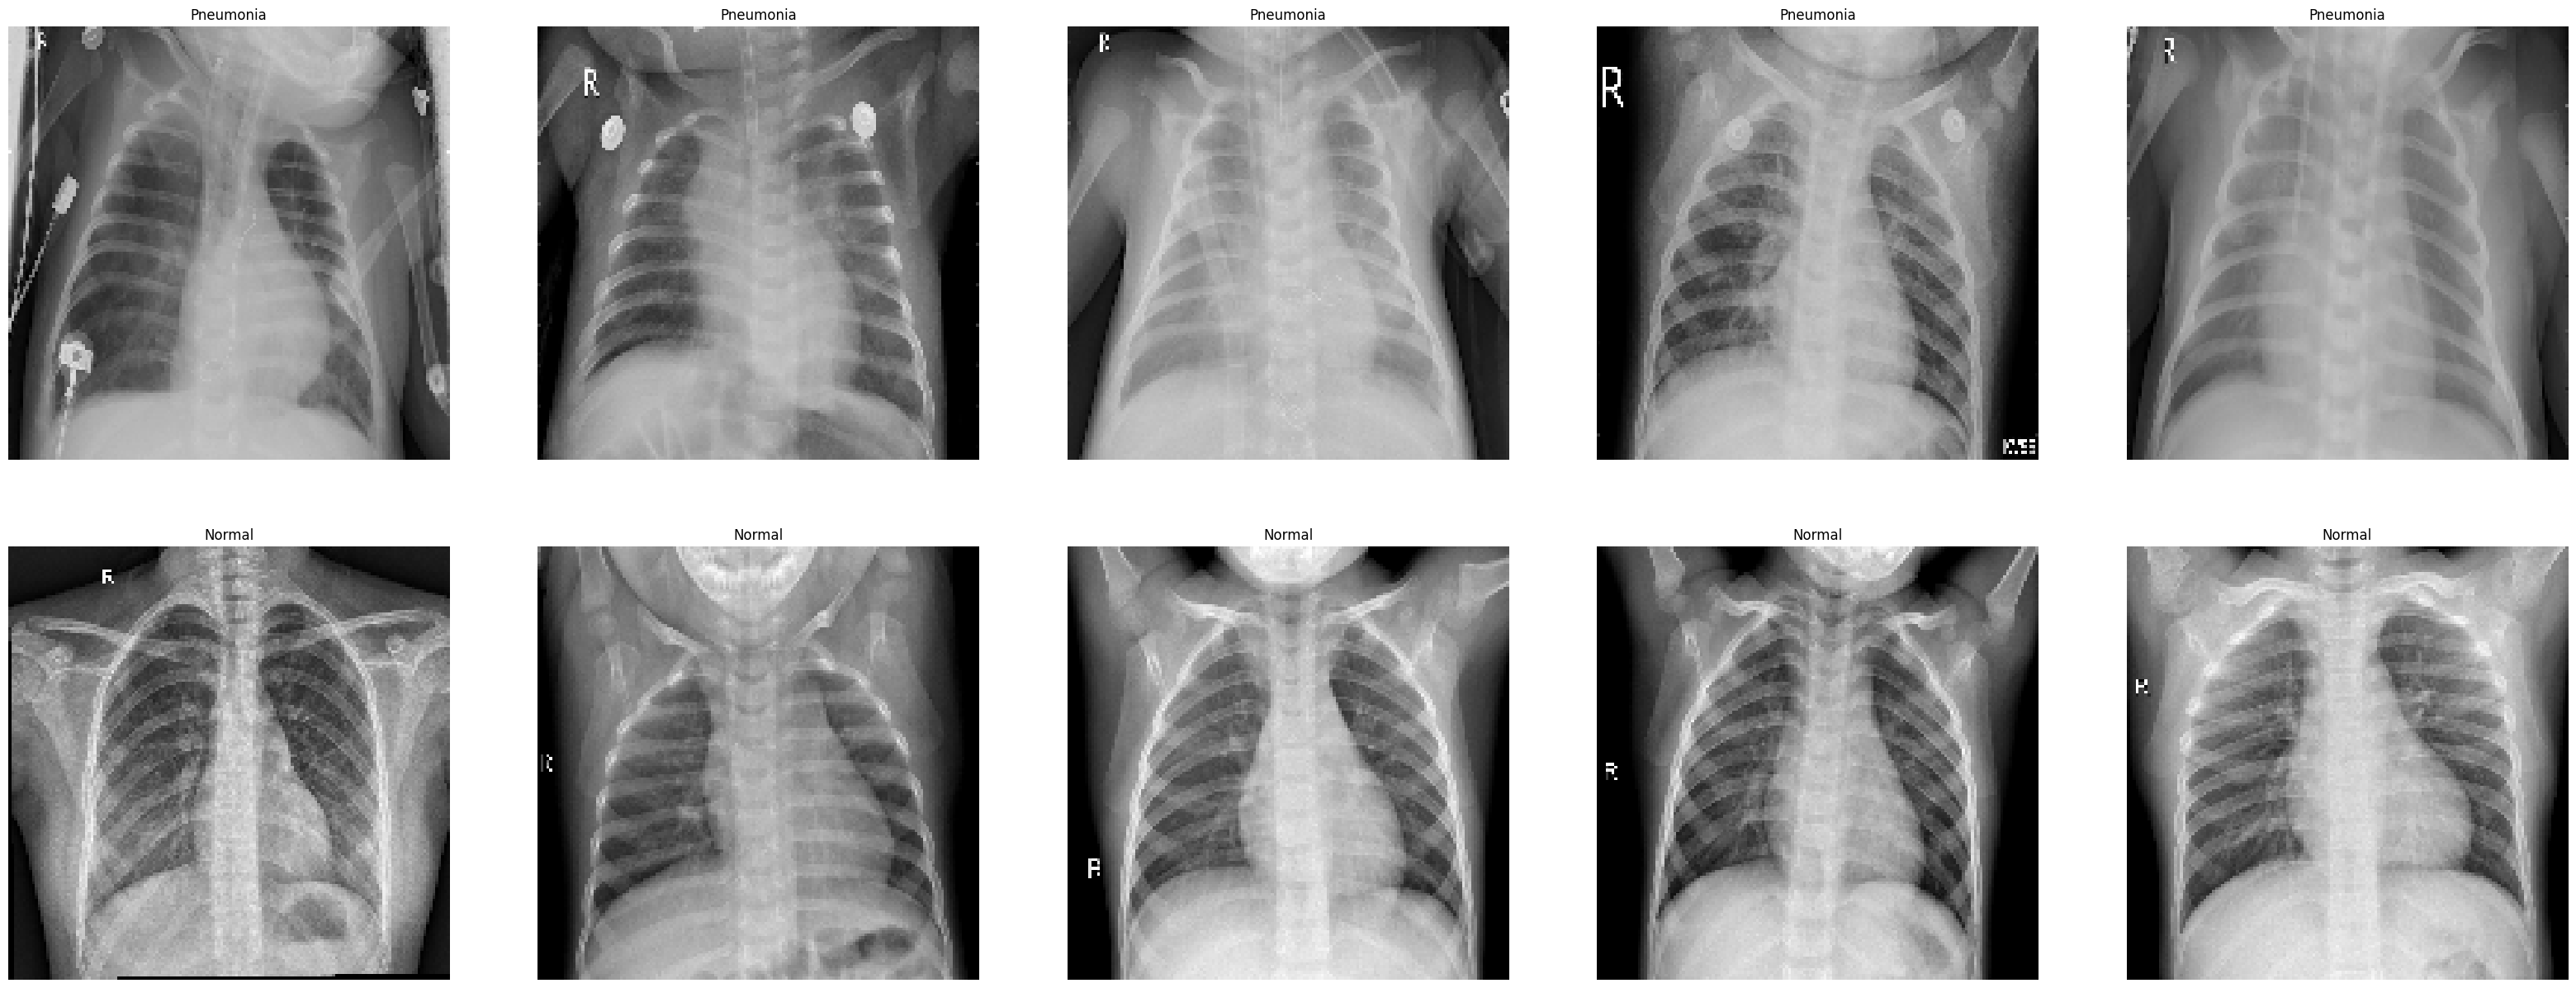

In [59]:
f, ax = plt.subplots(2,5, figsize=(40,15))
j = 0
i = 0
while j < 5:
    if train[i][1] == 0: # Label Pneumonia: 0
        ax[j//5, j%5].imshow(train[i][0], cmap='gray')
        ax[j//5, j%5].set_title("Pneumonia")
        ax[j//5, j%5].axis('off')
        ax[j//5, j%5].set_aspect('auto')
        j+=1
    i+=1
while j < 10:
    if train[i][1] == 1: # Label Normal: 1
        ax[j//5, j%5].imshow(train[i][0], cmap='gray')
        ax[j//5, j%5].set_title("Normal")
        ax[j//5, j%5].axis('off')
        ax[j//5, j%5].set_aspect('auto')
        j+=1
    i+=1
plt.show()

Text(0.5, 1.0, 'NORMAL')

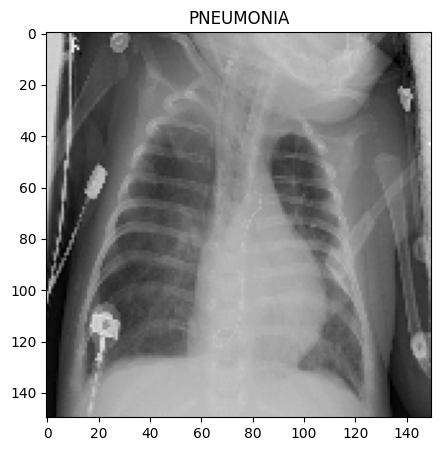

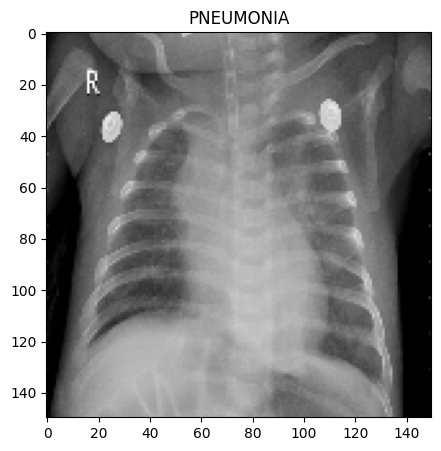

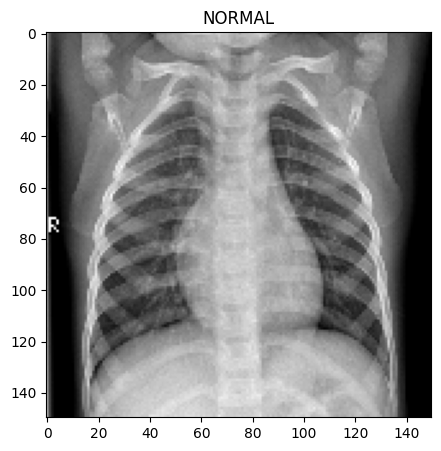

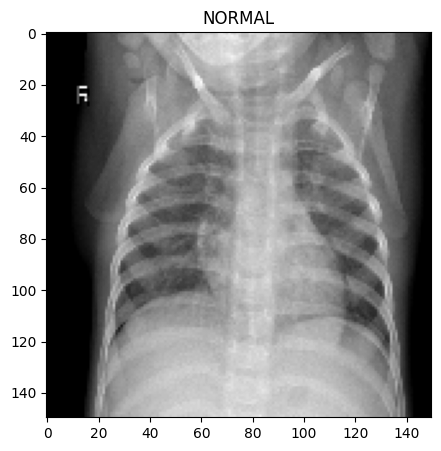

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[1][0], cmap='gray')
plt.title(labels[train[1][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-2][0], cmap='gray')
plt.title(labels[train[-2][1]])

Do you see visual differences between healthy and disease samples? 

Do you find sources of bias that could influence model performance? 

How do you preprocess the data for your further analysis?